In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


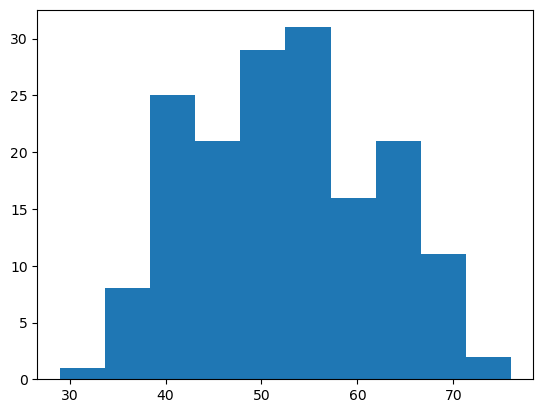

In [84]:
#Age distribution of dataset

fig, ax = plt.subplots()
bar = ax.hist(thd['age'])

plt.show()

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='target'>

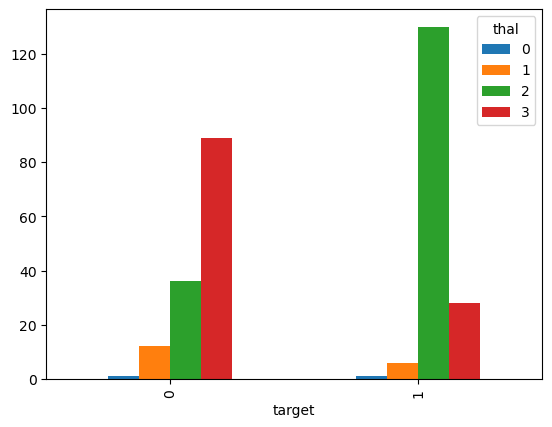

In [7]:
pd.crosstab(df.target, df.thal).plot(kind='bar')

<AxesSubplot:xlabel='cp'>

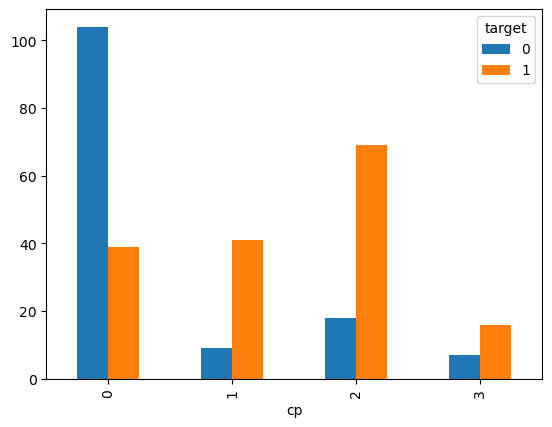

In [8]:
#Kind of chest pain vs target
pd.crosstab(df.cp, df.target).plot(kind='bar')

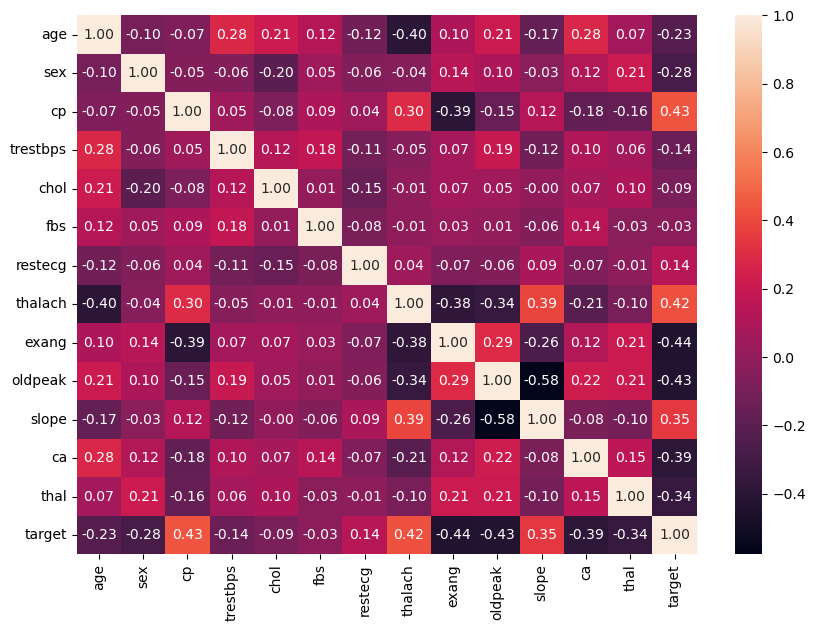

In [9]:
#correlation matrix
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.heatmap(df.corr(),
                 annot=True,
                fmt='.2f')
plt.show()

In [10]:
x = df.drop('target', axis=1)
y = df['target']

In [11]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
models = {
          'KNN': KNeighborsClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'LogisticRegression': LogisticRegression()
}

results = {}

In [13]:
np.random.seed(42)
for model_name, model in models.items():
    model.fit(x_train, y_train)
    results[model_name] = model.score(x_test, y_test)

In [14]:
results

{'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918,
 'LogisticRegression': 0.8852459016393442}

In [15]:
result_df = pd.DataFrame(data=results.values(),  index=results.keys(), columns=['score'])
result_df

,score
KNN,0.688525
RandomForestClassifier,0.836066
LogisticRegression,0.885246


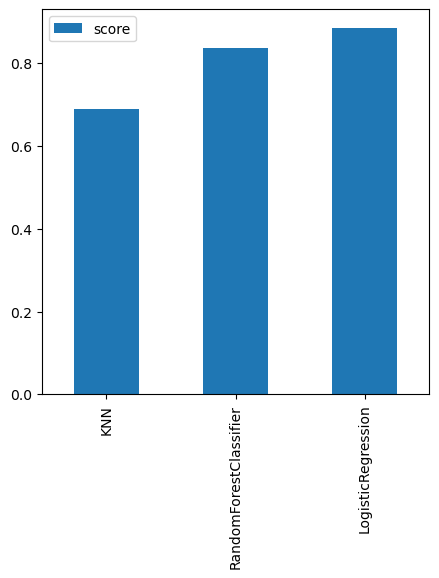

In [16]:
result_df.plot(kind='bar',figsize=(5, 5));

In [17]:
np.random.seed(42)
knn = KNeighborsClassifier()
grid = {'n_neighbors':list(range(1,21))}
gsknn = GridSearchCV(estimator=knn, 
                     param_grid=grid, 
                     cv=3,
                     verbose=True)



In [18]:
gsknn.fit(x_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=True)

In [19]:
gsknn.best_params_

{'n_neighbors': 11}

In [20]:
#Tuning hyper parameter of KNN manually(looping through n neighbors in range 1 to 20)
np.random.seed(42)
hyperparams = {}
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test)
    hyperparams[f"n neighbor{n}"] = accuracy
    
    

In [21]:
hyperparams


{'n neighbor1': 0.6229508196721312,
 'n neighbor2': 0.639344262295082,
 'n neighbor3': 0.6557377049180327,
 'n neighbor4': 0.6721311475409836,
 'n neighbor5': 0.6885245901639344,
 'n neighbor6': 0.7213114754098361,
 'n neighbor7': 0.7049180327868853,
 'n neighbor8': 0.6885245901639344,
 'n neighbor9': 0.6885245901639344,
 'n neighbor10': 0.7049180327868853,
 'n neighbor11': 0.7540983606557377,
 'n neighbor12': 0.7377049180327869,
 'n neighbor13': 0.7377049180327869,
 'n neighbor14': 0.7377049180327869,
 'n neighbor15': 0.6885245901639344,
 'n neighbor16': 0.7213114754098361,
 'n neighbor17': 0.6885245901639344,
 'n neighbor18': 0.6885245901639344,
 'n neighbor19': 0.7049180327868853,
 'n neighbor20': 0.6557377049180327}

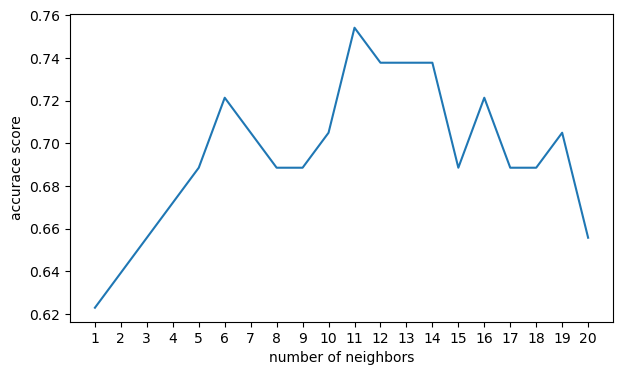

In [22]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot([i for i in range(1, 21)], hyperparams.values())
plt.xticks(np.arange(1, 21, 1))
ax.set(xlabel='number of neighbors',
       ylabel='accurace score');

In [23]:
#Tuning hyper parameters for Logistic Regression with grid search CV 
np.random.seed(42)
LR = LogisticRegression()
LR_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'C':[0.1, 1, 10, 100],
           'penalty':['l1', 'l2', 'elasticnet', 'none']}

gs_LR = GridSearchCV(estimator=LR,
                     param_grid=LR_grid,
                     cv=3,
                     verbose=True)

In [24]:
gs_LR.fit(x_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [25]:
def clf_evaluator(y_true, y_preds):
    '''
    clf_evaluator function returns accuracy, recall and precision
    '''
    accuracy = accuracy_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    
    results = {'accuracy': accuracy,
               'recall': recall,
               'precision': precision}
    
    return results


In [26]:
gs_LR_y_preds = gs_LR.predict(x_test)

In [27]:
gs_LR_results = clf_evaluator(y_test,gs_LR_y_preds)

In [28]:
gs_LR.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [30]:
#Tuning hyper parameters for Random Forest Classifier with grid search CV 
RFC_grid = {'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [2, 5, 6],
            'n_estimators': [90, 100, 1000],
            'max_depth': [2, 4, 6, 8]}

np.random.seed(42)
RFC = RandomForestClassifier()
gs_RFC = GridSearchCV(estimator=RFC,
                      param_grid=RFC_grid,
                      cv=3,
                      verbose=True)
gs_RFC.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 6],
                         'n_estimators': [90, 100, 1000]},
             verbose=True)

In [31]:
gs_RFC_y_preds = gs_RFC.predict(x_test)

gs_RFC_results = clf_evaluator(y_test, gs_RFC_y_preds)

In [32]:
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
bl_RFC_y_preds = clf.predict(x_test)
bl_RFC_results = clf_evaluator(y_test, bl_RFC_y_preds)


In [33]:
gs_RFC_results

{'accuracy': 0.8688524590163934,
 'recall': 0.90625,
 'precision': 0.8529411764705882}

In [34]:
 gs_LR_results

{'accuracy': 0.8852459016393442,
 'recall': 0.90625,
 'precision': 0.8787878787878788}

In [35]:
#Cross validation score on tuned logistic regression model
cv_gs_LR = cross_val_score(estimator=gs_LR, X=x, y=y, cv=5)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Fitting 3 folds for each of 80 candidates, totalling 240 fits
Fitting 3 folds for each of 80 candidates, totalling 240 fits
Fitting 3 folds for each of 80 candidates, totalling 240 fits
Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [36]:
cv_gs_LR.mean()

0.821584699453552

In [37]:
#Condusion matrix for gs_LR(Grid search CV logistic regression) model
np.random.seed(42)

cm = confusion_matrix(y_true=y_test, y_pred=gs_LR_y_preds)
cm

array([[25,  4],
       [ 3, 29]], dtype=int64)

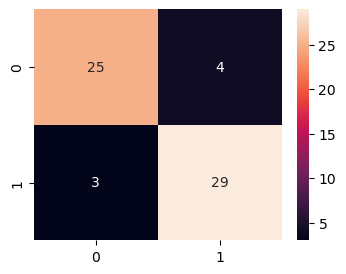

In [82]:
#Showing confusion matrix visually
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(cm, annot=True);

In [69]:
true_positives_LR = gs_LR.predict_proba(x_test)[:, 1]

true_positives_LR

array([0.0969997 , 0.69302829, 0.83111849, 0.02444397, 0.94755546,
       0.89196877, 0.63267226, 0.00146187, 0.0061093 , 0.50073494,
       0.7664336 , 0.06062305, 0.90381182, 0.04405994, 0.98805064,
       0.94447821, 0.98519668, 0.08511683, 0.0077428 , 0.01264694,
       0.65110521, 0.01391252, 0.19053563, 0.74499292, 0.94628031,
       0.66852729, 0.88659485, 0.57062847, 0.00806929, 0.93363585,
       0.04234737, 0.03069445, 0.00729931, 0.09732208, 0.73953193,
       0.06709756, 0.67186955, 0.88093213, 0.80676248, 0.84041356,
       0.50212747, 0.76922497, 0.83209769, 0.71645181, 0.84677248,
       0.00775154, 0.7817768 , 0.9519537 , 0.08378243, 0.02279857,
       0.07583449, 0.01145206, 0.89087405, 0.97854523, 0.19124486,
       0.00116093, 0.03879569, 0.96236597, 0.01408971, 0.00347125,
       0.03981224])

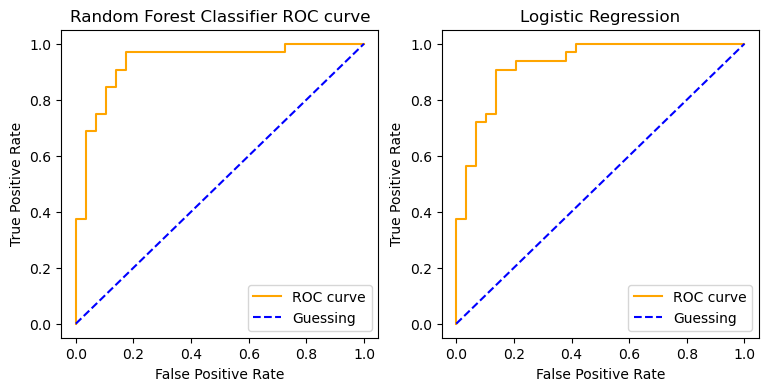

In [81]:
#Ploting ROC curve for random forest classifier versus logistic regression

np.random.seed(42)

true_positives_RFC = gs_RFC.predict_proba(x_test)[:, 1]
fprRFC, tprRFC, thresholdRFC = roc_curve(y_true=y_test, y_score=true_positives_RFC)

true_positives_LR = gs_LR.predict_proba(x_test)[:, 1]
fprLR, tprLR, thresholdLR = roc_curve(y_true=y_test, y_score=true_positives_LR)

fig, (ax0, ax1) = plt.subplots(figsize=(9, 4), 
                                nrows=1,
                                ncols=2)

ax0.plot(fprRFC, tprRFC, color='orange', label='ROC curve')
ax0.plot([0, 1], [0, 1], color='blue', ls='--', label='Guessing')
ax0.set(title='Random Forest Classifier ROC curve',
        xlabel='False Positive Rate',
        ylabel='True Positive Rate')
ax0.legend(['ROC curve', 'Guessing'])

ax1.plot(fprLR, tprLR, color='orange', label='ROC curve')
ax1.plot([0, 1], [0, 1], color='blue', ls='--', label='Guessing')
ax1.set(title='Logistic Regression ROC curve',
        xlabel='False Positive Rate',
        ylabel='True Positive Rate')
ax1.legend(['ROC curve', 'Guessing'])

plt.show()

In [94]:
gs_LR.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [95]:
Tuned_LR = LogisticRegression(C=1, penalty='l2', solver='newton-cg')

In [179]:
#Feature importance
Tuned_LR.fit(x_train, y_train)
FI = Tuned_LR.coef_
cols = list(df.columns)
cols.remove('target')
feature_importance = pd.DataFrame(FI, columns=cols)

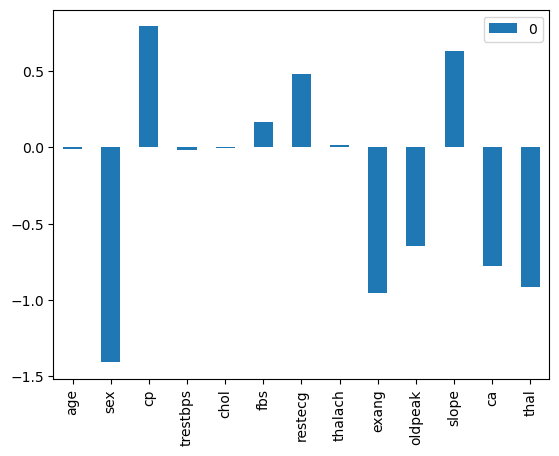

In [182]:
feature_importance.T.plot(kind='bar');